## EXPERIMENT 1: MagFace

In [1]:
## Load libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
import sys
sns.set(style="white")
%matplotlib inline
sys.path.append('../../utils')
from Model_utils.Model_funcs import *
from Result_metric_utils.result_metrics import *
from Data_proc_utils.Data_proc_funcs import *
from DET_utils.DET_plots import *
from DET_utils.DET import *
from Plotting_stats_utils.plotting_threshold import *
from Plotting_stats_utils.stats_tables import *
from IPython import embed


In [2]:
# Save figures
from matplotlib import pyplot as plt
save_fig_path = '../../figures/mag_2_1/'

### MagFace Results

This notebook loads the feature vectors from MagFace and run them through the results metrics:
FNIR, FPIR, FND, FPD, and GARBE

# Load data

In [7]:
feature_list_children = '../../data/data_full/feature_vectors/magface_feature_vectors/2.1/feature_vectors_from_children_filtered_bibel_FINAL_INFERENCE_finetuning_ex_2_1_ofsi_final.list'
feature_list_adults = '../../data/data_full/feature_vectors/magface_feature_vectors/2.1/feature_vectors_from_adults_bibel_cropped_retina_all_FINAL_INFERENCE_finetuning_ex_2_1_ofsi_final.list'

def load_and_compute_similarity(feature_list, dtype=np.float32):
    # Load data
    image_names, ids, num_ids, norm_feats = load_magface_vectors(feature_list)

    # Convert dtype to reduce memory usage
    norm_feats = norm_feats.astype(dtype)

    # Compute similarity matrix incrementally if possible
    sim_mat = np.dot(norm_feats, norm_feats.T)

    return image_names, ids, num_ids, sim_mat


In [8]:
# Load and compute for children
image_names_c, ids_c, num_ids_c, sim_mat_c = load_and_compute_similarity(feature_list_children)


/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_5.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_m.04n3v0_/m.04n3v0__0002.jpg
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_3.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_19.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_21.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_26.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_38.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_16

In [9]:

# Load and compute for adults
image_names_a, ids_a, num_ids_a, sim_mat_a = load_and_compute_similarity(feature_list_adults)


/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.02nrz2/m.02nrz2_0003.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.02nrz2/m.02nrz2_0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.02nrz2/m.02nrz2_0004.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.01241v/m.01241v_0002.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/African_m.05zn751/m.05zn751_0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/African_m.05zn751/m.05zn751_0002.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/African_m.05zn751/m.05zn751_0004.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.04n3v0_/m.04n3v0__0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.0kvkdqp/m.0kvkdqp_0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.0kvkdqp/m.0kvkdqp_0004.jpg
/data/data_full/adults_filtered_bib

In [10]:


# Dataframes with info, removes names not in magface results
children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
children_all = children_all[children_all.image_name.isin(image_names_c)]

adults_all_org = pd.read_csv('../../data/image_info_csvs/final_filtered_adults_df_BIBEL.csv')
adults_all = adults_all_org[adults_all_org.image_name.isin(image_names_a)]

# Find the threshold

In [11]:
random_states = [1,2]
percentiles = np.arange(0.0, 1.0, 0.03).tolist()
df_all_threshold_x = compute_metrics_ex_1_1(random_states, percentiles, children_all, adults_all, image_names_c, image_names_a, sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE)


/Users/gabriellakierulff/Desktop/HCAI/speciale/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: invalid value encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2
/Users/gabriellakierulff/Desktop/HCAI/speciale/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:16: RuntimeWarning: invalid value encountered in scalar divide
  FND = ((np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.0
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 1, percentile: 0.03
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 1, percentile: 0.06
FPD result:  0.0
FND result:  0.2400454382398661
GARBE result, GARBE close to 1 means more unfair:  0.18003407867989957
Done for random_state: 1, percentile: 0.09
FPD result:  0.0
FND result:  0.22296027270699928
GARBE result, GARBE close to 1 means more unfair:  0.16722020453024947
Done for random_state: 1, percentile: 0.12
FPD result:  0.0
FND result:  0.22033446659928327
GARBE result, GARBE close to 1 means more unfair:  0.16525084994946246
Done for random_state: 1, percentile: 0.15
FPD result:  0.0
FND result:  0.3691543785735781
GARBE result, GARBE close to 1 means more unfair:  0.2768657839

/Users/gabriellakierulff/Desktop/HCAI/speciale/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:10: RuntimeWarning: invalid value encountered in scalar divide
  FPD = (np.abs(fpir_c -fpir_a)/(2*(2**2)*((fnir_c+fnir_a)/2)))*2
/Users/gabriellakierulff/Desktop/HCAI/speciale/Master_Thesis/notebooks/model_results/../../utils/Result_metric_utils/result_metrics.py:16: RuntimeWarning: invalid value encountered in scalar divide
  FND = ((np.abs(fnir_c -fnir_a))/(2*(2**2)*((fnir_c+fnir_a)/2)))*2


FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.0
FPD result:  nan
FND result:  nan
GARBE result, GARBE close to 1 means more unfair:  nan
Done for random_state: 2, percentile: 0.03
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 2, percentile: 0.06
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 2, percentile: 0.09
FPD result:  0.0
FND result:  0.5
GARBE result, GARBE close to 1 means more unfair:  0.375
Done for random_state: 2, percentile: 0.12
FPD result:  0.0
FND result:  0.3532202705431052
GARBE result, GARBE close to 1 means more unfair:  0.2649152029073289
Done for random_state: 2, percentile: 0.15
FPD result:  0.0
FND result:  0.45613744004344015
GARBE result, GARBE close to 1 means more unfair:  0.3421030800325801
Done for random_state: 2, percentile: 0.18
FPD result

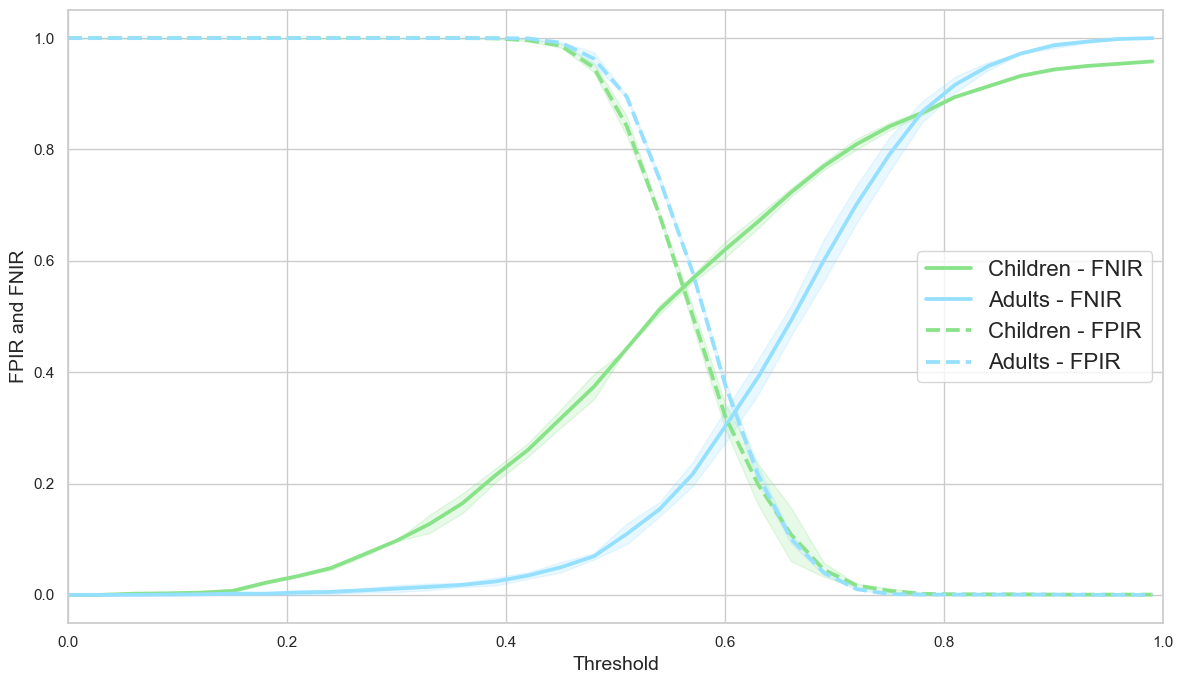

In [12]:

plot_threshold_metrics_ex_1_1_together_w_conf(df_all_threshold_x,  'MagFace ex. 2.1', save_fig_path)


# Stats - 10 experiments

In [14]:

random_states = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

df_all_results, sim_mat_dict_all_magface_ex1_1 = evaluate_metrics_ex_1_1(
    random_states, children_all, adults_all, image_names_c, image_names_a,
    sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, remove_ones, df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
)


FPD result:  0.0
FND result:  0.3773757411204078
GARBE result, GARBE close to 1 means more unfair:  0.28303180584030585
done
FPD result:  0.0
FND result:  0.26202101105411857
GARBE result, GARBE close to 1 means more unfair:  0.19651575829058893
done
FPD result:  0.0
FND result:  0.3795293271465787
GARBE result, GARBE close to 1 means more unfair:  0.28464699535993404
done
FPD result:  0.0
FND result:  0.2983684064151293
GARBE result, GARBE close to 1 means more unfair:  0.22377630481134697
done
FPD result:  0.0
FND result:  0.28598688597011507
GARBE result, GARBE close to 1 means more unfair:  0.2144901644775863
done
FPD result:  0.0
FND result:  0.28090281253127813
GARBE result, GARBE close to 1 means more unfair:  0.2106771093984586
done
FPD result:  0.0
FND result:  0.31474353610576516
GARBE result, GARBE close to 1 means more unfair:  0.2360576520793239
done
FPD result:  0.0
FND result:  0.40883145349102695
GARBE result, GARBE close to 1 means more unfair:  0.30662359011827023
don

In [15]:
# Generate the LaTeX table
latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)


\begin{table}
\caption{Descriptive Statistics} 
\label{table:descriptive_stats} 
\begin{tabular}{ccccccccc} 
\toprule
\textbf{{Iter.}} & $FNIR_c$ & $FNIR_a$ & $FPIR_c$ & $FPIR_a$ & $FPD$ & $FND$ & $GARBE$ & $T$ \\
\midrule
\textbf{0} & 0.039 & 0.005 & 1.000 & 1.000 & 0.000 & 0.377 & 0.283 & 0.240 \\
\textbf{1} & 0.048 & 0.015 & 1.000 & 1.000 & 0.000 & 0.262 & 0.197 & 0.240 \\
\textbf{2} & 0.045 & 0.006 & 1.000 & 1.000 & 0.000 & 0.380 & 0.285 & 0.240 \\
\textbf{3} & 0.042 & 0.011 & 1.000 & 1.000 & 0.000 & 0.298 & 0.224 & 0.240 \\
\textbf{4} & 0.041 & 0.011 & 1.000 & 1.000 & 0.000 & 0.286 & 0.214 & 0.240 \\
\textbf{5} & 0.043 & 0.012 & 1.000 & 1.000 & 0.000 & 0.281 & 0.211 & 0.240 \\
\textbf{6} & 0.047 & 0.011 & 1.000 & 1.000 & 0.000 & 0.315 & 0.236 & 0.240 \\
\textbf{7} & 0.052 & 0.005 & 1.000 & 1.000 & 0.000 & 0.409 & 0.307 & 0.240 \\
\textbf{8} & 0.046 & 0.008 & 1.000 & 1.000 & 0.000 & 0.357 & 0.268 & 0.240 \\
\textbf{9} & 0.040 & 0.003 & 1.000 & 1.000 & 0.000 & 0.424 & 0.318 & 0.240 

/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_77749/3719310588.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))


In [16]:
latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)

\begin{table}
\caption{Descriptive Statistics} 
\label{table:descriptive_stats} 
\begin{tabular}{ccccccccc} 
\toprule
\textbf{{Iter.}} & $FNIR_c$ & $FNIR_a$ & $FPIR_c$ & $FPIR_a$ & $FPD$ & $FND$ & $GARBE$ & $T$ \\
\midrule
\textbf{count} & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 \\
\textbf{mean} & 0.044 & 0.009 & 1.000 & 1.000 & 0.000 & 0.339 & 0.254 & 0.240 \\
\textbf{std} & 0.004 & 0.004 & 0.000 & 0.000 & 0.000 & 0.058 & 0.043 & 0.000 \\
\textbf{min} & 0.039 & 0.003 & 1.000 & 1.000 & 0.000 & 0.262 & 0.197 & 0.240 \\
\textbf{25%} & 0.041 & 0.006 & 1.000 & 1.000 & 0.000 & 0.289 & 0.217 & 0.240 \\
\textbf{50%} & 0.044 & 0.009 & 1.000 & 1.000 & 0.000 & 0.336 & 0.252 & 0.240 \\
\textbf{75%} & 0.047 & 0.011 & 1.000 & 1.000 & 0.000 & 0.379 & 0.284 & 0.240 \\
\textbf{max} & 0.052 & 0.015 & 1.000 & 1.000 & 0.000 & 0.424 & 0.318 & 0.240 \\
\bottomrule
\end{tabular} 
\end{table}



/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_77749/2945641856.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))


In [17]:
df_all_results.to_csv('df_all_results_mag_2_1.csv', index=False)


# Stats

In [18]:

import scipy.stats as stats
from scipy.stats import describe, gaussian_kde

t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_c'], df_all_results['FNIR_a'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 22.10200500161474
P-value: 3.754453175917922e-09


# Gemmer simscores

In [19]:
df_all_results.to_csv('results_10_experiment_2_1_magface.csv')

In [20]:
# Add together all

# make one  big array out of all arays named f'sim_mat_dict_all_magface_ex1_1['sim_mat_c_enrolled_iteration_{i}']' for i from 1 to 10
# List to hold all the arrays
sim_mat_c_enrolled_iterations = []

# Loop to access each array and append it to the list
for i in range(11, 21):
    key = f'sim_mat_c_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_c_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

# Concatenate all arrays into one big array
sim_mat_c_enrolled_iterations_all = np.concatenate(sim_mat_c_enrolled_iterations)
sim_mat_c_enrolled_iterations_all = pd.DataFrame(sim_mat_c_enrolled_iterations_all)
sim_mat_c_enrolled_iterations_all.to_csv('sim_mat_c_enrolled_iterations_all_2_1_mag.csv', index=False)
# Print the big array
print(len(sim_mat_c_enrolled_iterations_all))



# Add together all

# make one  big array out of all arays named f'sim_mat_dict_all_magface_ex1_1['sim_mat_c_enrolled_iteration_{i}']' for i from 1 to 10

# List to hold all the arrays
sim_mat_a_enrolled_iterations = []

# Loop to access each array and append it to the list
# for i in range(1, 11):
for i in range(11, 21):
    key = f'sim_mat_a_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_a_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

# Concatenate all arrays into one big array
sim_mat_a_enrolled_iterations_all = np.concatenate(sim_mat_a_enrolled_iterations)
sim_mat_a_enrolled_iterations_all = pd.DataFrame(sim_mat_a_enrolled_iterations_all)
sim_mat_a_enrolled_iterations_all.to_csv('sim_mat_a_enrolled_iterations_all_2_1_mag.csv', index=False)


# Print the big array
print(len(sim_mat_a_enrolled_iterations_all))


124748
41822


In [21]:
# Add together all

# make one  big array out of all arays named f'sim_mat_dict_all_magface_ex1_1['sim_mat_c_enrolled_iteration_{i}']' for i from 1 to 10

# List to hold all the arrays
sim_mat_c_non_enrolled_iterations = []

# Loop to access each array and append it to the list
# for i in range(1, 11):
for i in range(11, 21):
    key = f'sim_mat_c_non_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_c_non_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

sim_mat_c_non_enrolled_iterations_all = np.concatenate(sim_mat_c_non_enrolled_iterations)
sim_mat_c_non_enrolled_iterations_all = pd.DataFrame(sim_mat_c_non_enrolled_iterations_all)
sim_mat_c_non_enrolled_iterations_all.to_csv('sim_mat_c_non_enrolled_iterations_all_2_1_mag.csv', index=False)
# Print the big array
print(len(sim_mat_c_non_enrolled_iterations_all))


# Add together all

# make one  big array out of all arays named f'sim_mat_dict_all_magface_ex1_1['sim_mat_c_enrolled_iteration_{i}']' for i from 1 to 10

# List to hold all the arrays
sim_mat_a_non_enrolled_iterations = []

# Loop to access each array and append it to the list
# for i in range(1, 11):
for i in range(11, 21):
    key = f'sim_mat_a_non_enrolled_iteration_{i}'
    if key in sim_mat_dict_all_magface_ex1_1:
        sim_mat_a_non_enrolled_iterations.append(sim_mat_dict_all_magface_ex1_1[key])

sim_mat_a_non_enrolled_iterations_all = np.concatenate(sim_mat_a_non_enrolled_iterations)
sim_mat_a_non_enrolled_iterations_all = pd.DataFrame(sim_mat_a_non_enrolled_iterations_all)
sim_mat_a_non_enrolled_iterations_all.to_csv('sim_mat_a_non_enrolled_iterations_all_2_1_mag.csv', index=False)

# Print the big array
print(len(sim_mat_a_non_enrolled_iterations_all))


32872996
32603172


# Loading pre-saved stuff

In [22]:
sim_mat_c_enrolled_iterations_all = (pd.read_csv('sim_mat_c_enrolled_iterations_all_2_1_mag.csv')).values.flatten()
sim_mat_a_enrolled_iterations_all = (pd.read_csv('sim_mat_a_enrolled_iterations_all_2_1_mag.csv')).values.flatten()
sim_mat_c_non_enrolled_iterations_all = (pd.read_csv('sim_mat_c_non_enrolled_iterations_all_2_1_mag.csv')).values.flatten()
sim_mat_a_non_enrolled_iterations_all = (pd.read_csv('sim_mat_a_non_enrolled_iterations_all_2_1_mag.csv')).values.flatten()


In [23]:
from scipy.stats import describe, gaussian_kde
import math

def descriptive_statistics(mated_scores, nonmated_scores):
    stats_labels = ["Observations", "Minimum", "Maximum", "Mean", "St. Dev.", "Skewness", "Ex. Kurtosis"]
    mated_stats = describe(mated_scores)
    mated_stats = [mated_stats.nobs, mated_stats.minmax[0], mated_stats.minmax[1], mated_stats.mean, math.sqrt(mated_stats.variance), mated_stats.skewness, mated_stats.kurtosis]
    nonmated_stats = describe(nonmated_scores)
    nonmated_stats = [nonmated_stats.nobs, nonmated_stats.minmax[0], nonmated_stats.minmax[1], nonmated_stats.mean, math.sqrt(nonmated_stats.variance), nonmated_stats.skewness, nonmated_stats.kurtosis]

    stats_system_df = pd.DataFrame(np.array([stats_labels, mated_stats, nonmated_stats]).T, columns=["Statistic", "Mated", "Non-mated"])
    stats_system_df = stats_system_df.astype({"Statistic": str, "Mated": float, "Non-mated": float})
    return stats_system_df

In [24]:
mated_scores1 = sim_mat_a_enrolled_iterations_all
nonmated_scores1 = sim_mat_a_non_enrolled_iterations_all
scores_type1 = "similarity"
stats_system1_df = descriptive_statistics(mated_scores1, nonmated_scores1)
display(stats_system1_df)

,Statistic,Mated,Non-mated
0,Observations,41822.000000,3.260317e+07
1,Minimum,0.015231,-2.865133e-01
2,Maximum,0.985514,9.073756e-01
3,Mean,0.682423,2.331862e-01
4,St. Dev.,0.119452,1.112527e-01
5,Skewness,-0.797686,1.089551e-01
6,Ex. Kurtosis,2.268010,4.407727e-02


In [25]:
mated_scores2 = sim_mat_c_enrolled_iterations_all
nonmated_scores2 = sim_mat_c_non_enrolled_iterations_all
scores_type2 = "similarity"
stats_system2_df = descriptive_statistics(mated_scores2, nonmated_scores2)
display(stats_system2_df)

,Statistic,Mated,Non-mated
0,Observations,124748.000000,3.287300e+07
1,Minimum,-0.023222,-3.772375e-01
2,Maximum,0.998448,9.999846e-01
3,Mean,0.565032,1.811832e-01
4,St. Dev.,0.164800,1.220986e-01
5,Skewness,-0.109079,8.836857e-02
6,Ex. Kurtosis,-0.269470,-4.021651e-02


In [26]:
mated_colour = "green"
mated_label = "Mated scores"
nonmated_colour = "red"
nonmated_label = "Non-mated scores"

figure_size = (12,6)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 16
label_fontsize = 20

threshold_colour = "black"
threshold_style = "--"
round_digits = 5
sns.set(style="white", palette="muted", color_codes=True)
plt.rc("axes", axisbelow=True)

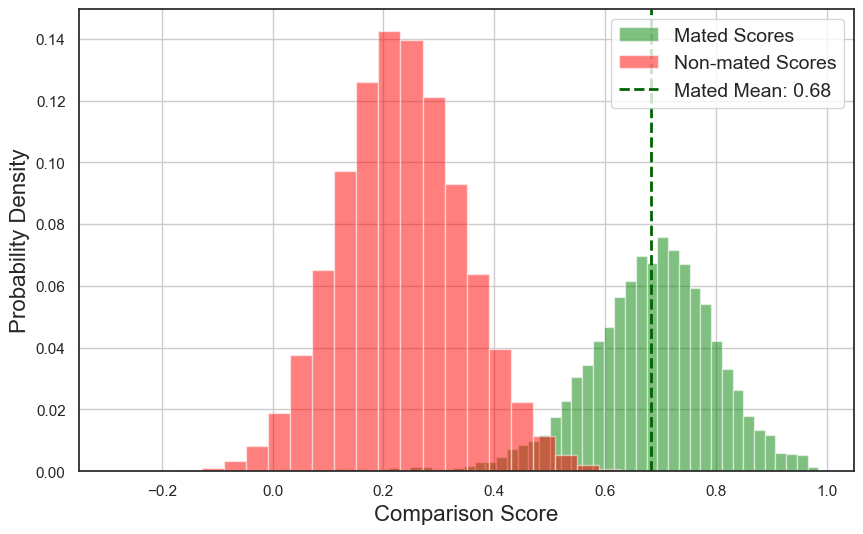

In [27]:

plot_histogram(mated_scores1, nonmated_scores1, normalise=True, title = 'Adults - MagFace ex. 2.1 ',save_fig_path=save_fig_path, gem_som = 'A1')


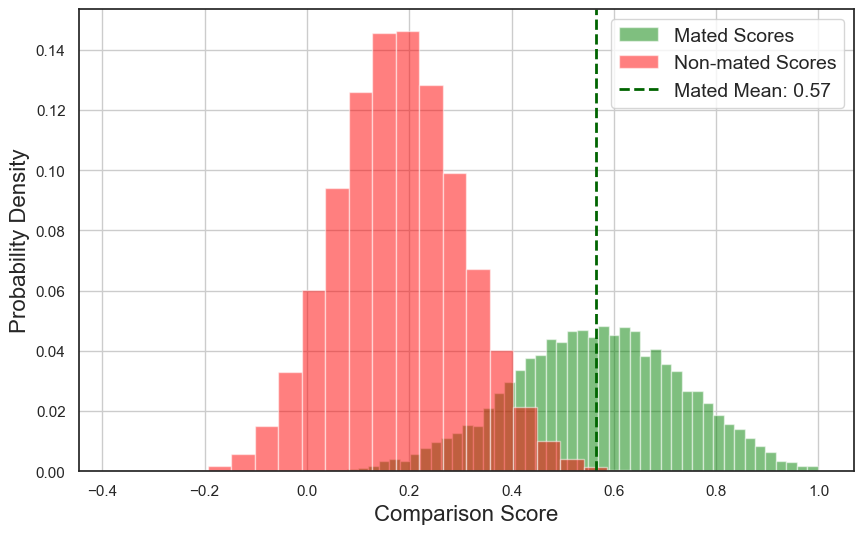

In [28]:
plot_histogram(mated_scores2, nonmated_scores2, normalise=True, title = 'Children - MagFace ex. 2.1 ',save_fig_path=save_fig_path, gem_som='C1')


# DET curves

In [29]:
d_prime_system1 = d_prime(mated_scores1, nonmated_scores1)
print("d' child =", round(d_prime_system1, round_digits))

d_prime_system2 = d_prime(mated_scores2, nonmated_scores2)
print("d' adult =", round(d_prime_system2, round_digits))


d' child = 3.89205
d' adult = 2.64671


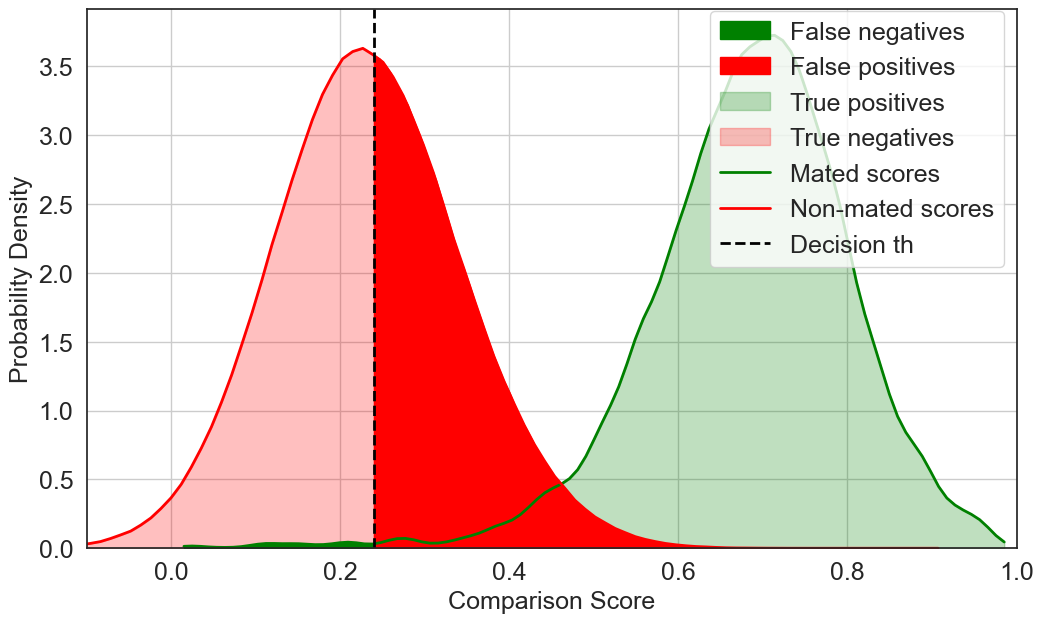

In [30]:
from DET_utils.DET_plots import *
threshold1 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
kde_with_threshold(mated_scores1, nonmated_scores1, scores_type1, threshold1, save_fig_path=save_fig_path, title='A2')


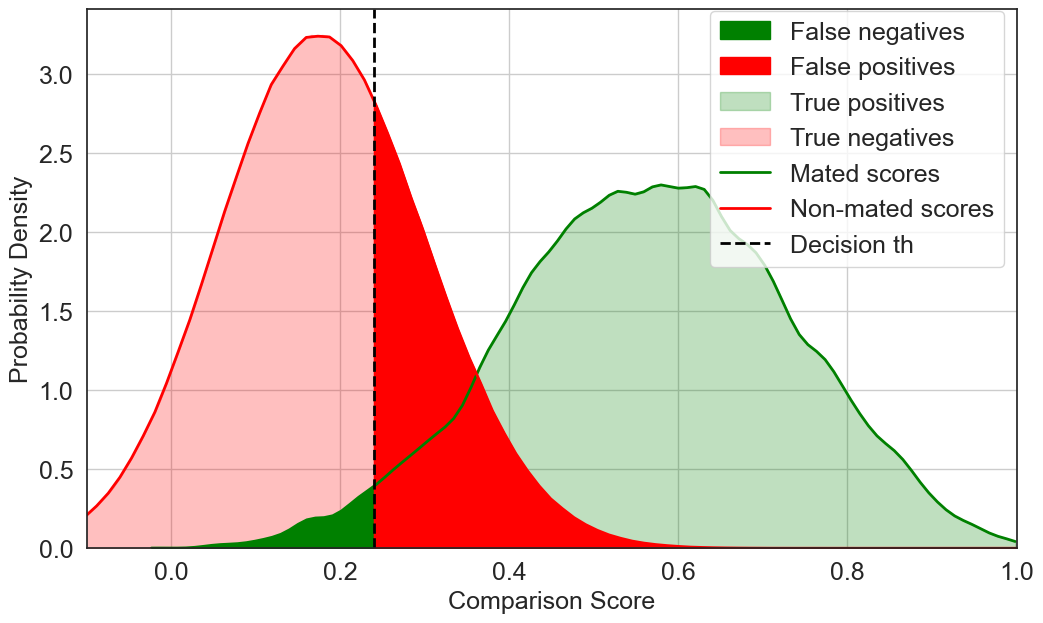

In [31]:
threshold2 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
kde_with_threshold(mated_scores2, nonmated_scores2, scores_type2, threshold2, save_fig_path=save_fig_path, title='C2')

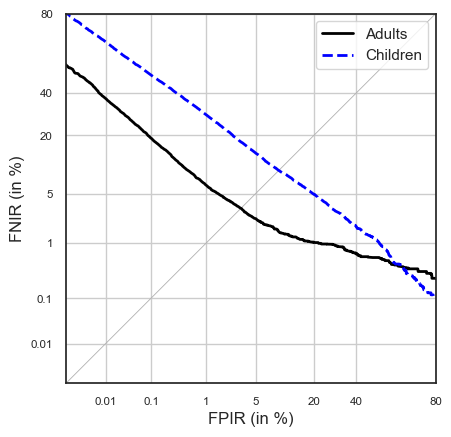

In [32]:
# def DET_plotting_1_1(mated_scores1, mated_scores2,nonmated_scores1, nonmated_scores2, score_type= "similarity",title = 'Adults vs Children - MagFace ex. 2.2', save_fig_path= 'save_fig_path'):
#     figure_size = (12,7)
#     alpha_shade = 0.25
#     alpha_fill = 1.0
#     linewidth = 2
#     legend_loc = "upper left"
#     legend_anchor = (1.0, 1.02)
#     legend_cols = 1
#     legend_fontsize = 18
#     label_fontsize = 18
#     tick_fontsize = 18
#     system_name1 = 'Adults'
#     system_name2 = 'Children'

#     det = DET(biometric_evaluation_type='identification', abbreviate_axes=True, plot_eer_line=True)#, plot_title=title)
#     det.x_limits = np.array([1e-5, .8])
#     det.y_limits = np.array([1e-5, .8])
#     det.x_ticks = np.array([1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 80e-2])
#     det.x_ticklabels = np.array(['0.01','0.1', '1', '5', '20', '40', '80'])
#     det.y_ticks = np.array([1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 80e-2])
#     det.y_ticklabels = np.array(['0.01','0.1', '1', '5', '20', '40', '80'])
#     det.create_figure()
#     det.plot(tar=adjust_scores_for_DET(mated_scores1, score_type), non=adjust_scores_for_DET(nonmated_scores1, score_type), label=system_name1)
#     det.plot(tar=adjust_scores_for_DET(mated_scores2, score_type), non=adjust_scores_for_DET(nonmated_scores2, score_type), label=system_name2)
#     det.legend_on(loc="upper right")
#     det.show()

DET_plotting_1_1(mated_scores1, mated_scores2,nonmated_scores1, nonmated_scores2,"similarity", 'Adults vs Children - MagFace ex. 2.1', save_fig_path= save_fig_path)
